In [41]:
import os
import cv2
import numpy as np
import time
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import shutil
from tqdm import tqdm

# Load pre-trained VGG16 model and remove the top layer
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Function to extract features from a batch of images
def extract_features_batch(image_paths, model):
    batch_images = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        batch_images.append(img)
    batch_images = np.array(batch_images)
    features = model.predict(batch_images)
    return features

# Function to load images and extract features in batches
def load_and_extract_features_in_batches(folder_path, batch_size=32):
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
    features = []
    start_time = time.time()
    for i in tqdm(range(0, len(image_paths), batch_size), desc="Extracting features", unit="batch"):
        batch_paths = image_paths[i:i + batch_size]
        batch_features = extract_features_batch(batch_paths, model)
        features.append(batch_features)
    end_time = time.time()
    print(f"Feature extraction time: {end_time - start_time} seconds")
    return np.vstack(features), image_paths

In [42]:

# Load features
folder_path = './extracted_data/frames'  # Replace with your folder path
features, image_paths = load_and_extract_features_in_batches(folder_path)

Extracting features:   0%|          | 0/305 [00:00<?, ?batch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:   0%|          | 1/305 [00:03<18:15,  3.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   1%|          | 2/305 [00:07<20:27,  4.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:   1%|          | 3/305 [00:13<24:16,  4.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   1%|▏         | 4/305 [00:22<32:37,  6.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   2%|▏         | 5/305 [00:31<36:13,  7.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   2%|▏         | 6/305 [00:40<38:57,  7.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   2%|▏         | 7/305 [00:49<40:30,  8.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   3%|▎         | 8/305 [00:57<41:11,  8.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   3%|▎         | 9/305 [01:06<41:53,  8.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   3%|▎         | 10/305 [01:15<42:18,  8.61s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   4%|▎         | 11/305 [01:23<41:17,  8.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   4%|▍         | 12/305 [01:28<35:46,  7.33s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   4%|▍         | 13/305 [01:32<31:37,  6.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   5%|▍         | 14/305 [01:37<28:41,  5.91s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:   5%|▍         | 15/305 [01:42<27:15,  5.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   5%|▌         | 16/305 [01:47<25:58,  5.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:   6%|▌         | 17/305 [01:52<25:07,  5.23s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:   6%|▌         | 18/305 [01:57<25:16,  5.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   6%|▌         | 19/305 [02:06<29:46,  6.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   7%|▋         | 20/305 [02:14<33:11,  6.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   7%|▋         | 21/305 [02:23<35:39,  7.53s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   7%|▋         | 22/305 [02:32<37:36,  7.97s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   8%|▊         | 23/305 [02:41<38:52,  8.27s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   8%|▊         | 24/305 [02:50<39:23,  8.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   8%|▊         | 25/305 [02:59<40:24,  8.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   9%|▊         | 26/305 [03:08<40:26,  8.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   9%|▉         | 27/305 [03:16<39:27,  8.52s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   9%|▉         | 28/305 [03:25<40:23,  8.75s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  10%|▉         | 29/305 [03:35<41:26,  9.01s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  10%|▉         | 30/305 [03:44<41:18,  9.01s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  10%|█         | 31/305 [03:53<41:02,  8.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  10%|█         | 32/305 [04:03<43:09,  9.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  11%|█         | 33/305 [04:08<36:50,  8.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  11%|█         | 34/305 [04:14<33:34,  7.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  11%|█▏        | 35/305 [04:22<33:36,  7.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 36/305 [04:30<34:16,  7.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 37/305 [04:38<34:52,  7.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 38/305 [04:46<35:01,  7.87s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  13%|█▎        | 39/305 [04:53<33:31,  7.56s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  13%|█▎        | 40/305 [05:00<32:52,  7.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  13%|█▎        | 41/305 [05:07<32:27,  7.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  14%|█▍        | 42/305 [05:14<31:27,  7.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  14%|█▍        | 43/305 [05:22<32:33,  7.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  14%|█▍        | 44/305 [05:31<33:50,  7.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  15%|█▍        | 45/305 [05:38<33:11,  7.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  15%|█▌        | 46/305 [05:45<32:33,  7.54s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  15%|█▌        | 47/305 [05:53<33:00,  7.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  16%|█▌        | 48/305 [06:00<32:01,  7.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  16%|█▌        | 49/305 [06:06<30:11,  7.08s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  16%|█▋        | 50/305 [06:13<29:11,  6.87s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  17%|█▋        | 51/305 [06:20<29:33,  6.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  17%|█▋        | 52/305 [06:30<33:39,  7.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  17%|█▋        | 53/305 [06:41<36:43,  8.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  18%|█▊        | 54/305 [06:53<40:29,  9.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  18%|█▊        | 55/305 [07:04<42:29, 10.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  18%|█▊        | 56/305 [07:14<42:13, 10.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  19%|█▊        | 57/305 [07:25<43:05, 10.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  19%|█▉        | 58/305 [07:36<42:53, 10.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  19%|█▉        | 59/305 [07:47<43:44, 10.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  20%|█▉        | 60/305 [07:58<43:58, 10.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  20%|██        | 61/305 [08:10<44:59, 11.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  20%|██        | 62/305 [08:21<45:08, 11.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  21%|██        | 63/305 [08:31<43:14, 10.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  21%|██        | 64/305 [08:38<39:01,  9.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  21%|██▏       | 65/305 [08:45<35:20,  8.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  22%|██▏       | 66/305 [08:51<32:21,  8.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  22%|██▏       | 67/305 [08:58<30:12,  7.61s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  22%|██▏       | 68/305 [09:05<29:53,  7.57s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  23%|██▎       | 69/305 [09:13<30:26,  7.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  23%|██▎       | 70/305 [09:22<31:17,  7.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  23%|██▎       | 71/305 [09:29<30:09,  7.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  24%|██▎       | 72/305 [09:37<30:40,  7.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  24%|██▍       | 73/305 [09:51<36:38,  9.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


Extracting features:  24%|██▍       | 74/305 [10:08<45:07, 11.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  25%|██▍       | 75/305 [10:19<44:16, 11.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  25%|██▍       | 76/305 [10:30<44:16, 11.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  25%|██▌       | 77/305 [10:44<46:30, 12.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  26%|██▌       | 78/305 [10:59<49:49, 13.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  26%|██▌       | 79/305 [11:12<49:05, 13.03s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  26%|██▌       | 80/305 [11:24<47:31, 12.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  27%|██▋       | 81/305 [11:35<45:53, 12.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  27%|██▋       | 82/305 [11:46<44:17, 11.92s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  27%|██▋       | 83/305 [11:59<44:59, 12.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  28%|██▊       | 84/305 [12:11<44:07, 11.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  28%|██▊       | 85/305 [12:19<40:11, 10.96s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  28%|██▊       | 86/305 [12:26<35:35,  9.75s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  29%|██▊       | 87/305 [12:33<32:21,  8.91s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  29%|██▉       | 88/305 [12:40<29:56,  8.28s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  29%|██▉       | 89/305 [12:49<30:34,  8.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  30%|██▉       | 90/305 [13:00<33:18,  9.30s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  30%|██▉       | 91/305 [13:12<36:25, 10.21s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  30%|███       | 92/305 [13:23<36:08, 10.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  30%|███       | 93/305 [13:34<37:15, 10.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


Extracting features:  31%|███       | 94/305 [13:51<43:27, 12.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  31%|███       | 95/305 [14:04<44:11, 12.63s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  31%|███▏      | 96/305 [14:15<42:53, 12.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


Extracting features:  32%|███▏      | 97/305 [14:33<47:51, 13.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  32%|███▏      | 98/305 [14:45<46:20, 13.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  32%|███▏      | 99/305 [14:56<43:43, 12.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  33%|███▎      | 100/305 [15:08<42:03, 12.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  33%|███▎      | 101/305 [15:19<41:11, 12.11s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  33%|███▎      | 102/305 [15:31<40:12, 11.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  34%|███▍      | 103/305 [15:42<38:57, 11.57s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  34%|███▍      | 104/305 [15:53<38:19, 11.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  34%|███▍      | 105/305 [16:03<37:09, 11.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  35%|███▍      | 106/305 [16:13<36:01, 10.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  35%|███▌      | 107/305 [16:26<37:41, 11.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  35%|███▌      | 108/305 [16:38<37:32, 11.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  36%|███▌      | 109/305 [16:49<37:50, 11.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  36%|███▌      | 110/305 [17:02<38:48, 11.94s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  36%|███▋      | 111/305 [17:14<38:25, 11.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  37%|███▋      | 112/305 [17:26<38:06, 11.85s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  37%|███▋      | 113/305 [17:37<37:18, 11.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  37%|███▋      | 114/305 [17:49<37:13, 11.69s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  38%|███▊      | 115/305 [17:59<36:07, 11.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  38%|███▊      | 116/305 [18:10<35:01, 11.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  38%|███▊      | 117/305 [18:21<34:54, 11.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  39%|███▊      | 118/305 [18:33<35:01, 11.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  39%|███▉      | 119/305 [18:44<34:49, 11.23s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  39%|███▉      | 120/305 [18:55<34:44, 11.27s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  40%|███▉      | 121/305 [19:07<35:06, 11.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  40%|████      | 122/305 [19:17<33:44, 11.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  40%|████      | 123/305 [19:28<33:02, 10.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  41%|████      | 124/305 [19:41<34:49, 11.54s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  41%|████      | 125/305 [19:54<36:02, 12.02s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  41%|████▏     | 126/305 [20:07<37:00, 12.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  42%|████▏     | 127/305 [20:19<36:31, 12.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  42%|████▏     | 128/305 [20:32<37:01, 12.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  42%|████▏     | 129/305 [20:43<34:52, 11.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  43%|████▎     | 130/305 [20:53<33:34, 11.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  43%|████▎     | 131/305 [21:03<32:09, 11.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  43%|████▎     | 132/305 [21:13<31:03, 10.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  44%|████▎     | 133/305 [21:25<31:27, 10.97s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  44%|████▍     | 134/305 [21:47<40:20, 14.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  44%|████▍     | 135/305 [22:01<39:59, 14.11s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  45%|████▍     | 136/305 [22:11<36:52, 13.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  45%|████▍     | 137/305 [22:22<34:48, 12.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  45%|████▌     | 138/305 [22:33<33:01, 11.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  46%|████▌     | 139/305 [22:43<31:43, 11.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  46%|████▌     | 140/305 [22:54<30:41, 11.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  46%|████▌     | 141/305 [23:04<30:02, 10.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  47%|████▋     | 142/305 [23:15<29:27, 10.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  47%|████▋     | 143/305 [23:25<29:12, 10.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  47%|████▋     | 144/305 [23:39<30:59, 11.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  48%|████▊     | 145/305 [23:51<31:29, 11.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  48%|████▊     | 146/305 [24:03<31:08, 11.75s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  48%|████▊     | 147/305 [24:16<32:07, 12.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  49%|████▊     | 148/305 [24:28<32:03, 12.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  49%|████▉     | 149/305 [24:40<31:24, 12.08s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  49%|████▉     | 150/305 [24:52<31:15, 12.10s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  50%|████▉     | 151/305 [25:05<31:11, 12.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  50%|████▉     | 152/305 [25:18<31:50, 12.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  50%|█████     | 153/305 [25:28<30:16, 11.95s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  50%|█████     | 154/305 [25:40<29:25, 11.69s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  51%|█████     | 155/305 [25:51<29:09, 11.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  51%|█████     | 156/305 [26:02<28:32, 11.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  51%|█████▏    | 157/305 [26:13<27:49, 11.28s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  52%|█████▏    | 158/305 [26:24<27:34, 11.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  52%|█████▏    | 159/305 [26:35<27:15, 11.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  52%|█████▏    | 160/305 [26:46<26:35, 11.01s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  53%|█████▎    | 161/305 [26:57<26:47, 11.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  53%|█████▎    | 162/305 [27:08<26:30, 11.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  53%|█████▎    | 163/305 [27:20<26:57, 11.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  54%|█████▍    | 164/305 [27:32<27:12, 11.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  54%|█████▍    | 165/305 [27:43<26:06, 11.19s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  54%|█████▍    | 166/305 [27:54<25:39, 11.08s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  55%|█████▍    | 167/305 [28:04<25:02, 10.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  55%|█████▌    | 168/305 [28:15<25:12, 11.04s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  55%|█████▌    | 169/305 [28:27<25:38, 11.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  56%|█████▌    | 170/305 [28:41<26:56, 11.97s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  56%|█████▌    | 171/305 [28:53<26:42, 11.96s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  56%|█████▋    | 172/305 [29:01<23:48, 10.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  57%|█████▋    | 173/305 [29:09<22:20, 10.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  57%|█████▋    | 174/305 [29:18<20:52,  9.56s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  57%|█████▋    | 175/305 [29:27<20:48,  9.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  58%|█████▊    | 176/305 [29:41<23:11, 10.79s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  58%|█████▊    | 177/305 [30:03<29:56, 14.04s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  58%|█████▊    | 178/305 [30:14<28:19, 13.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  59%|█████▊    | 179/305 [30:26<27:16, 12.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  59%|█████▉    | 180/305 [30:38<26:25, 12.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  59%|█████▉    | 181/305 [30:50<25:24, 12.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  60%|█████▉    | 182/305 [31:02<25:25, 12.40s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


Extracting features:  60%|██████    | 183/305 [31:20<28:14, 13.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


Extracting features:  60%|██████    | 184/305 [31:36<29:14, 14.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  61%|██████    | 185/305 [31:48<27:43, 13.87s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  61%|██████    | 186/305 [32:02<27:33, 13.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


Extracting features:  61%|██████▏   | 187/305 [32:21<30:10, 15.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  62%|██████▏   | 188/305 [32:33<27:51, 14.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  62%|██████▏   | 189/305 [32:47<27:44, 14.35s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  62%|██████▏   | 190/305 [33:01<26:56, 14.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  63%|██████▎   | 191/305 [33:13<26:03, 13.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  63%|██████▎   | 192/305 [33:26<25:10, 13.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  63%|██████▎   | 193/305 [33:37<23:35, 12.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  64%|██████▎   | 194/305 [33:47<21:47, 11.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  64%|██████▍   | 195/305 [33:57<20:32, 11.21s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  64%|██████▍   | 196/305 [34:07<20:01, 11.03s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  65%|██████▍   | 197/305 [34:18<19:39, 10.92s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  65%|██████▍   | 198/305 [34:28<19:18, 10.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  65%|██████▌   | 199/305 [34:38<18:21, 10.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  66%|██████▌   | 200/305 [34:46<17:11,  9.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  66%|██████▌   | 201/305 [34:57<17:39, 10.19s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  66%|██████▌   | 202/305 [35:07<17:15, 10.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  67%|██████▋   | 203/305 [35:16<16:32,  9.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  67%|██████▋   | 204/305 [35:25<15:59,  9.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  67%|██████▋   | 205/305 [35:35<16:08,  9.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  68%|██████▊   | 206/305 [35:45<16:10,  9.80s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  68%|██████▊   | 207/305 [35:56<16:16,  9.96s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  68%|██████▊   | 208/305 [36:09<17:40, 10.93s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  69%|██████▊   | 209/305 [36:17<16:14, 10.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  69%|██████▉   | 210/305 [36:25<15:01,  9.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  69%|██████▉   | 211/305 [36:33<13:59,  8.93s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  70%|██████▉   | 212/305 [36:40<13:13,  8.53s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  70%|██████▉   | 213/305 [36:52<14:43,  9.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  70%|███████   | 214/305 [37:04<15:22, 10.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  70%|███████   | 215/305 [37:16<16:06, 10.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  71%|███████   | 216/305 [37:27<16:11, 10.91s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  71%|███████   | 217/305 [37:38<15:52, 10.83s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  71%|███████▏  | 218/305 [37:49<15:41, 10.83s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  72%|███████▏  | 219/305 [37:59<15:29, 10.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  72%|███████▏  | 220/305 [38:10<15:12, 10.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  72%|███████▏  | 221/305 [38:20<14:54, 10.65s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  73%|███████▎  | 222/305 [38:32<14:59, 10.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  73%|███████▎  | 223/305 [38:44<15:13, 11.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  73%|███████▎  | 224/305 [38:58<16:25, 12.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  74%|███████▍  | 225/305 [39:09<15:50, 11.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  74%|███████▍  | 226/305 [39:21<15:35, 11.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  74%|███████▍  | 227/305 [39:33<15:31, 11.94s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  75%|███████▍  | 228/305 [39:45<15:05, 11.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  75%|███████▌  | 229/305 [39:56<14:37, 11.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  75%|███████▌  | 230/305 [40:07<14:19, 11.46s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  76%|███████▌  | 231/305 [40:18<14:02, 11.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  76%|███████▌  | 232/305 [40:29<13:40, 11.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  76%|███████▋  | 233/305 [40:40<13:20, 11.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  77%|███████▋  | 234/305 [40:51<13:12, 11.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  77%|███████▋  | 235/305 [41:02<12:51, 11.02s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  77%|███████▋  | 236/305 [41:12<12:33, 10.91s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  78%|███████▊  | 237/305 [41:23<12:14, 10.79s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  78%|███████▊  | 238/305 [41:34<12:00, 10.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  78%|███████▊  | 239/305 [41:45<11:53, 10.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  79%|███████▊  | 240/305 [41:56<11:59, 11.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  79%|███████▉  | 241/305 [42:09<12:28, 11.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  79%|███████▉  | 242/305 [42:23<12:46, 12.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


Extracting features:  80%|███████▉  | 243/305 [42:38<13:31, 13.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


Extracting features:  80%|████████  | 244/305 [42:54<14:10, 13.94s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


Extracting features:  80%|████████  | 245/305 [43:09<14:19, 14.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


Extracting features:  81%|████████  | 246/305 [43:24<14:22, 14.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  81%|████████  | 247/305 [43:38<13:55, 14.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


Extracting features:  81%|████████▏ | 248/305 [44:00<15:43, 16.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  82%|████████▏ | 249/305 [44:12<14:13, 15.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  82%|████████▏ | 250/305 [44:26<13:39, 14.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  82%|████████▏ | 251/305 [44:40<13:03, 14.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  83%|████████▎ | 252/305 [44:54<12:42, 14.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  83%|████████▎ | 253/305 [45:15<14:17, 16.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  83%|████████▎ | 254/305 [45:23<11:53, 13.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  84%|████████▎ | 255/305 [45:34<10:52, 13.04s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  84%|████████▍ | 256/305 [45:45<10:11, 12.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  84%|████████▍ | 257/305 [45:56<09:37, 12.03s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  85%|████████▍ | 258/305 [46:07<09:07, 11.65s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  85%|████████▍ | 259/305 [46:18<08:45, 11.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  85%|████████▌ | 260/305 [46:29<08:27, 11.28s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  86%|████████▌ | 261/305 [46:40<08:11, 11.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  86%|████████▌ | 262/305 [46:51<07:56, 11.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  86%|████████▌ | 263/305 [47:02<07:41, 11.00s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  87%|████████▋ | 264/305 [47:13<07:34, 11.10s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  87%|████████▋ | 265/305 [47:23<07:14, 10.87s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  87%|████████▋ | 266/305 [47:37<07:42, 11.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


Extracting features:  88%|████████▊ | 267/305 [47:53<08:17, 13.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


Extracting features:  88%|████████▊ | 268/305 [48:07<08:15, 13.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  88%|████████▊ | 269/305 [48:21<08:03, 13.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


Extracting features:  89%|████████▊ | 270/305 [48:42<09:12, 15.79s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  89%|████████▉ | 271/305 [48:51<07:50, 13.83s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  89%|████████▉ | 272/305 [49:05<07:35, 13.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  90%|████████▉ | 273/305 [49:17<06:57, 13.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  90%|████████▉ | 274/305 [49:28<06:26, 12.46s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  90%|█████████ | 275/305 [49:39<06:01, 12.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  90%|█████████ | 276/305 [49:52<05:55, 12.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  91%|█████████ | 277/305 [50:02<05:29, 11.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  91%|█████████ | 278/305 [50:13<05:08, 11.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  91%|█████████▏| 279/305 [50:23<04:51, 11.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  92%|█████████▏| 280/305 [50:34<04:38, 11.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  92%|█████████▏| 281/305 [50:45<04:25, 11.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  92%|█████████▏| 282/305 [50:56<04:11, 10.95s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  93%|█████████▎| 283/305 [51:07<04:01, 10.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  93%|█████████▎| 284/305 [51:18<03:48, 10.87s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  93%|█████████▎| 285/305 [51:28<03:35, 10.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  94%|█████████▍| 286/305 [51:38<03:20, 10.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  94%|█████████▍| 287/305 [51:48<03:08, 10.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  94%|█████████▍| 288/305 [51:59<02:56, 10.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  95%|█████████▍| 289/305 [52:09<02:44, 10.27s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  95%|█████████▌| 290/305 [52:20<02:36, 10.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features:  95%|█████████▌| 291/305 [52:33<02:40, 11.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  96%|█████████▌| 292/305 [52:46<02:31, 11.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  96%|█████████▌| 293/305 [52:57<02:18, 11.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  96%|█████████▋| 294/305 [53:08<02:04, 11.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  97%|█████████▋| 295/305 [53:19<01:54, 11.46s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  97%|█████████▋| 296/305 [53:32<01:45, 11.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  97%|█████████▋| 297/305 [53:44<01:34, 11.85s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  98%|█████████▊| 298/305 [53:55<01:20, 11.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  98%|█████████▊| 299/305 [54:06<01:08, 11.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


Extracting features:  98%|█████████▊| 300/305 [54:22<01:04, 12.85s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


Extracting features:  99%|█████████▊| 301/305 [54:39<00:56, 14.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


Extracting features:  99%|█████████▉| 302/305 [54:51<00:40, 13.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:  99%|█████████▉| 303/305 [55:03<00:26, 13.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


Extracting features: 100%|█████████▉| 304/305 [55:17<00:13, 13.21s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features: 100%|██████████| 305/305 [55:22<00:00, 10.89s/batch]

Feature extraction time: 3322.668561935425 seconds


In [43]:
features54 = features.copy()

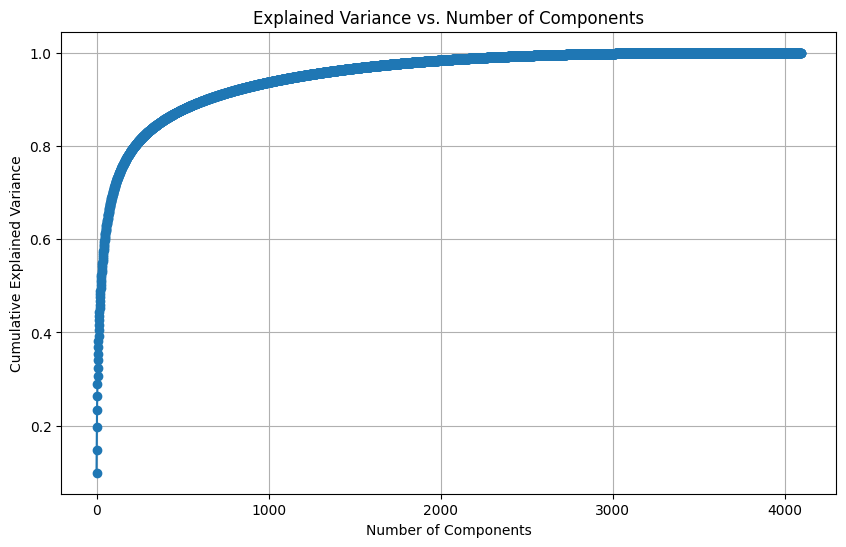

Optimal number of components: 1188
PCA time: 30.551672220230103 seconds


In [46]:
import matplotlib.pyplot as plt

# Calculate explained variance for each component
pca = PCA()
pca.fit(features54)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance to see the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 95% of the variance
explained_variance_threshold = 0.95
n_components_optimal = np.argmax(explained_variance >= explained_variance_threshold) + 1
print(f"Optimal number of components: {n_components_optimal}")

# Apply PCA for dimensionality reduction with the optimal number of components
pca_start_time = time.time()
pca = PCA(n_components=n_components_optimal)
reduced_features = pca.fit_transform(features54)
pca_end_time = time.time()
print(f"PCA time: {pca_end_time - pca_start_time} seconds")

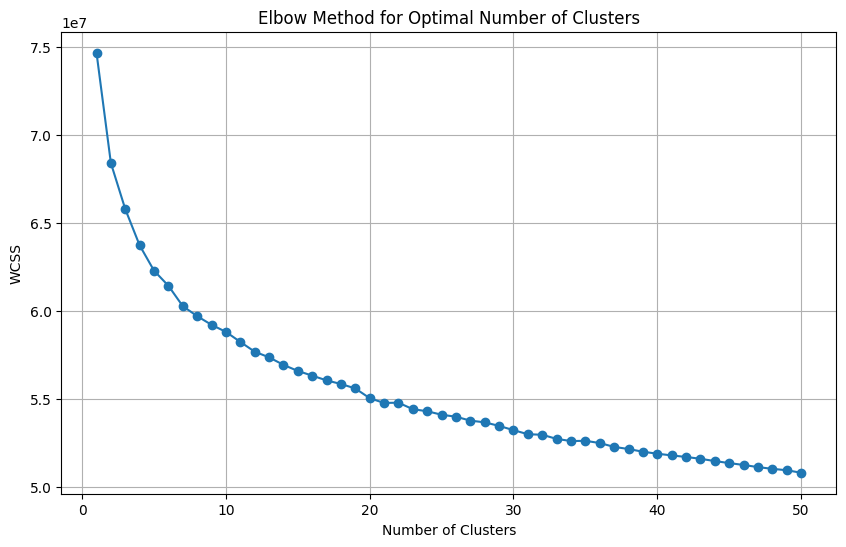

KMeans time: 1.3784 seconds
Clusters: [4 4 4 ... 2 2 2]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Function to compute WCSS for a range of cluster numbers
def compute_wcss(features, max_clusters=10):
    wcss = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to plot the elbow method graph
def plot_elbow_method(wcss):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Function to perform KMeans clustering with the optimal number of clusters
def perform_kmeans(features, n_clusters):
    kmeans_start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    kmeans_end_time = time.time()
    print(f"KMeans time: {kmeans_end_time - kmeans_start_time:.4f} seconds")
    return clusters

# Assume `reduced_features` is already defined and contains your PCA-reduced data
if not isinstance(reduced_features, (np.ndarray, pd.DataFrame)):
    raise TypeError("The 'reduced_features' variable must be a NumPy array or pandas DataFrame.")

# Compute WCSS
wcss = compute_wcss(reduced_features, max_clusters=50)

# Plot elbow method
plot_elbow_method(wcss)

# Based on the elbow method plot, manually determine the optimal number of clusters
optimal_num_clusters = 6  

# Perform KMeans clustering with the optimal number of clusters
clusters = perform_kmeans(reduced_features, optimal_num_clusters)
print(f"Clusters: {clusters}")

In [64]:
# Function to select diverse images from each cluster
def select_diverse_images(features, clusters, n_select=1000):
    selected_indices = []
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_features = features[cluster_indices]
        
        # Calculate pairwise distances within the cluster
        distances = euclidean_distances(cluster_features)
        
        # Select images with maximum sum of distances to other images
        diversity_scores = distances.sum(axis=1)
        selected_cluster_indices = cluster_indices[np.argsort(diversity_scores)[-n_select:]]
        selected_indices.extend(selected_cluster_indices)
    
    return selected_indices

In [ ]:
import os
import numpy as np
import shutil
from sklearn.metrics.pairwise import euclidean_distances

# Create output directories
output_dirs = ['Bruno', 'Hikari', 'Tucci', 'Fabio', 'Godoy', 'rest']
for dir_name in output_dirs:
    os.makedirs(dir_name, exist_ok=True)

# Select diverse images
n_select_per_cluster = 5000 // optimal_num_clusters
diverse_indices = select_diverse_images(reduced_features, clusters, n_select_per_cluster)

# Shuffle the selected indices
np.random.shuffle(diverse_indices)

# Distribute images to folders
for i, idx in enumerate(diverse_indices):
    src_path = image_paths[idx]
    if i < 5000:
        dest_folder = output_dirs[i // 1000]
    else:
        dest_folder = 'rest'
    
    dest_path = os.path.join(dest_folder, os.path.basename(src_path))
    shutil.copy(src_path, dest_path)

# Move remaining images to 'rest' folder
all_indices = set(range(len(image_paths)))
remaining_indices = list(all_indices - set(diverse_indices))
for idx in remaining_indices:
    src_path = image_paths[idx]
    dest_path = os.path.join('rest', os.path.basename(src_path))
    shutil.copy(src_path, dest_path)

print("Image distribution completed.")

# Print summary
for dir_name in output_dirs:
    n_images = len([f for f in os.listdir(dir_name) if f.endswith('.png')])
    print(f"{dir_name}: {n_images} images")